<ipython-input-5-5fc65eb22366>:28: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  E = linspace(0.01,19.9, 100)
<ipython-input-5-5fc65eb22366>:16: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  return tan(sqrt(c * e))
<ipython-input-5-5fc65eb22366>:16: DeprecationWarning: scipy.tan is deprecated and will be removed in SciPy 2.0.0, use numpy.tan instead
  return tan(sqrt(c * e))


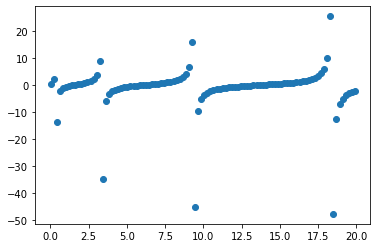

<ipython-input-5-5fc65eb22366>:20: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  return sqrt((V - e) / e)
<ipython-input-5-5fc65eb22366>:24: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  return -sqrt(e / (V - e))


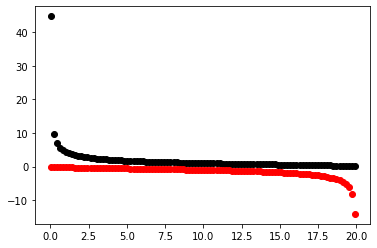

<ipython-input-5-5fc65eb22366>:16: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  return tan(sqrt(c * e))
<ipython-input-5-5fc65eb22366>:16: DeprecationWarning: scipy.tan is deprecated and will be removed in SciPy 2.0.0, use numpy.tan instead
  return tan(sqrt(c * e))
<ipython-input-5-5fc65eb22366>:20: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  return sqrt((V - e) / e)
<ipython-input-5-5fc65eb22366>:24: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  return -sqrt(e / (V - e))


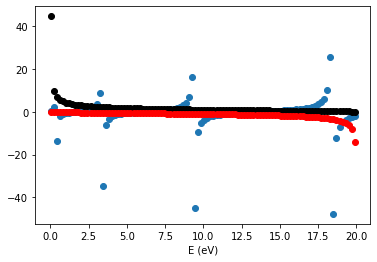

E0 =  0.7496435546875
E1 =  1.27001953125
E2 =  4.49951171875
E3 =  5.05029296875
E4 =  7.8489990234375
E5 =  11.21435546875


<ipython-input-5-5fc65eb22366>:16: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  return tan(sqrt(c * e))
<ipython-input-5-5fc65eb22366>:16: DeprecationWarning: scipy.tan is deprecated and will be removed in SciPy 2.0.0, use numpy.tan instead
  return tan(sqrt(c * e))
<ipython-input-5-5fc65eb22366>:20: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  return sqrt((V - e) / e)
<ipython-input-5-5fc65eb22366>:24: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  return -sqrt(e / (V - e))


In [5]:
#Exercício 1
from scipy import tan, sqrt, linspace
from pylab import plot, show, xlabel

# Constants
w = 1  # width of well in nm
V = 20  # well depth in eV
m = 9.1094 * 10 ** -31  # electron mass in kg
h_bar = 6.582119514 * 10 ** -16  # h bar in eV * s
c = w ** 2 * m / (1.602 * 10 ** -1) / (2 * h_bar ** 2)
accuracy = 0.001  # in eV


def f(e):
    # use 1 eV = 1.602 * 10 ** -19 J to convert w^2 m in to ev * s^2
    return tan(sqrt(c * e))


def g(e):
    return sqrt((V - e) / e)


def h(e):
    return -sqrt(e / (V - e))


# make plots
E = linspace(0.01,19.9, 100)
plot(E, f(E), 'o')
show()
plot(E, g(E), 'ko')
plot(E, h(E), 'ro')
show()


plot(E, f(E), 'o')
plot(E, g(E), 'ko')
plot(E, h(E), 'ro')
xlabel('E (eV)')
show()


def f1(x):
    return f(x) - g(x)


def f2(x):
    return f(x) - h(x)


# from exercise 6.13
def find_root(f, x1, x2, accuracy):

    def midpoint(x, y):
        return (x + y) / 2

    def have_same_sign(x, y):
        if x < 0 and y < 0 or x > 0 and y > 0:
            return True
        else:
            return False

    #
    while abs(x1 - x2) > accuracy:
        x = midpoint(x1, x2)
        if have_same_sign(f(x1), f(x)):
            x1 = x
        elif have_same_sign(f(x), f(x2)):
            x2 = x
        elif abs(x) < accuracy:
            return x

    return midpoint(x1, x2)


print('E0 = ', find_root(f1, 0.02, 0.75, accuracy))
print('E1 = ', find_root(f2, 1, 1.5, accuracy))
print('E2 = ', find_root(f1, 2.5, 4.5, accuracy))
print('E3 = ', find_root(f2, 5, 6, accuracy))
print('E4 = ', find_root(f1, 7.5, 9, accuracy))
print('E5 = ', find_root(f2, 10, 12, accuracy))

In [7]:
#exercício 2
from scipy import linspace
from pylab import plot, show

# Constants
G = 6.674 * 10 ** -11  # gravitational constant
M = 5.974 * 10 ** 24  # mass of earth in kg
m = 7.348 * 10 ** 22  # mass of moon in kg
R = 3.844 * 10 ** 8  # Radius of earth in m
omega = 2.662 * 10 ** -6  # angular velocity of moon
accuracy = 10 ** -8


def f(r):
    return G * M * (R - r) ** 2 - G * m * r ** 2 - omega ** 2 * r ** 3 * (R - r) ** 2


def f_prime(r):
    return -2 * G * M * (R - r) - 2 * G * m * r - 3 * omega ** 2 * r ** 2 * (R - r) ** 2  \
           + 2 * omega ** 2 * r ** 3 * (R - r)


# Plot f to estimate root
# r = linspace(0.75 * R, R, 100)
# f_vals = list(map(f, r))
# plot(r, f_vals, 'o')
# show()

# From the plot, r = 3.2e8 seems like a good starting value

# Solve for the roots of f using Newton's method
def find_root(f, g, start_val, accuracy):
    x = start_val
    delta = f(x) / g(x)
    while abs(delta) > accuracy:
        delta = f(x) / g(x)
        x -= delta

    return x


# Note that f is a rapidly increasing function away from the root
r = find_root(f, f_prime, 3.2 * 10 ** 8, accuracy)
print(r)
print(f(r))

326045071.66535544
-281474976710656.0
